In [1]:
import sys
import os

# Step 1: Compute the path 3 levels up from the current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../" * 3))

# Step 2: Add it to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Step 3: Now you can import your module
import qf
import matplotlib.pyplot as plt
import numpy as np

/Users/PhilippSchmidt/miniforge3/envs/finrl-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "NFLX"]

data = qf.get_data(tickers, 
                   start=qf.DEFAULT_TRAIN_START, 
                   end=qf.DEFAULT_TRAIN_END, 
                   indicators="close")
data.head(10)

UnboundLocalError: local variable 'data' referenced before assignment

<Axes: title={'center': 'Close Price of All Tickers'}, xlabel='Date', ylabel='Price'>

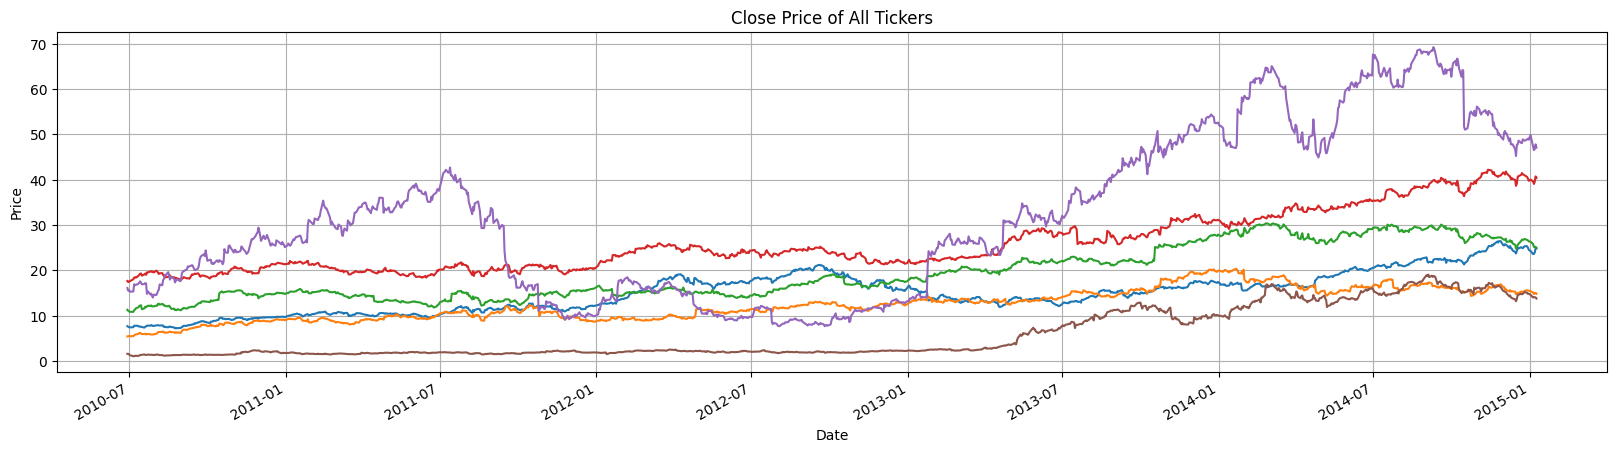

In [ ]:
data.plot(figsize=(20, 5), title="Close Price of All Tickers", ylabel="Price", xlabel="Date", grid=True, legend=False)

In [ ]:
# Calculate log returns
returns = data.pct_change().dropna()
log_returns = data.pct_change().apply(lambda x: np.log(1 + x)).dropna()

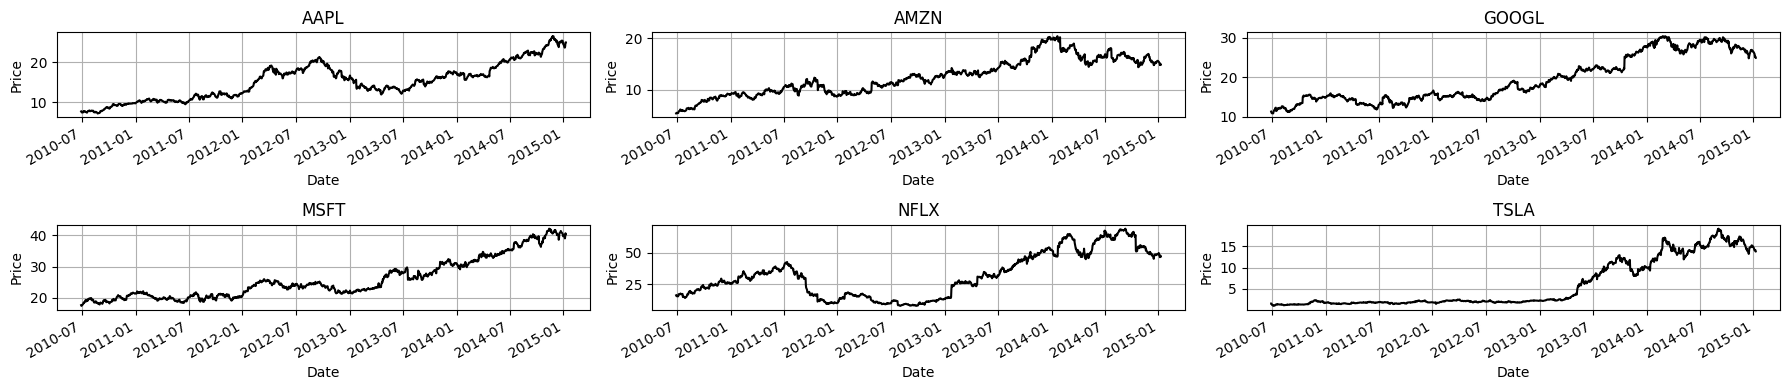

In [ ]:
qf.plot_grid(data)

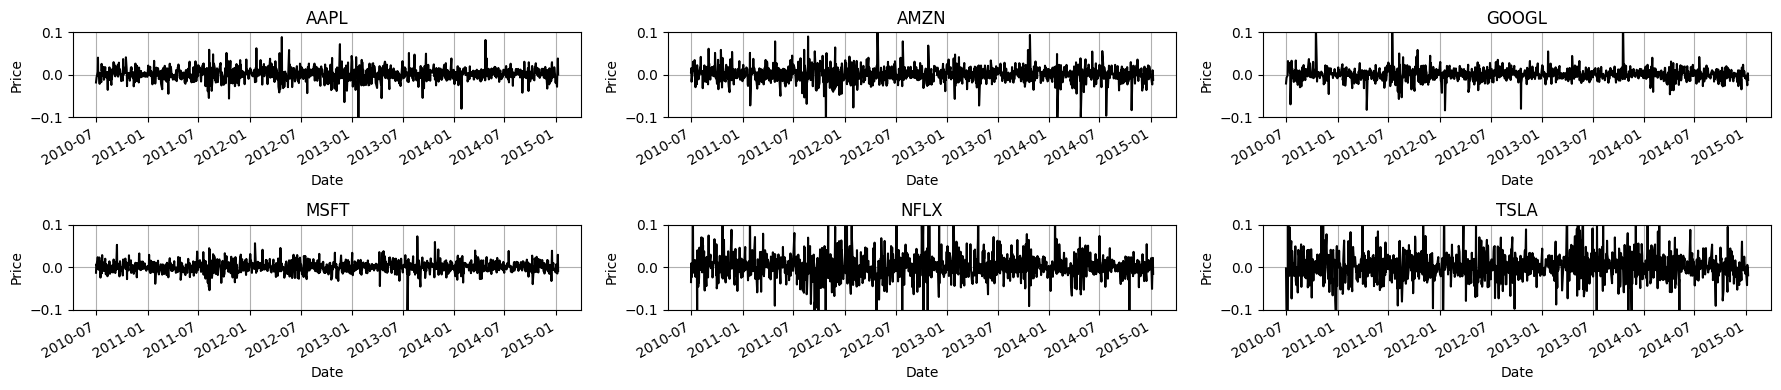

In [ ]:
qf.plot_grid(returns, n_cols=3, ylim=(-0.1, 0.1), figsize=(6, 2))

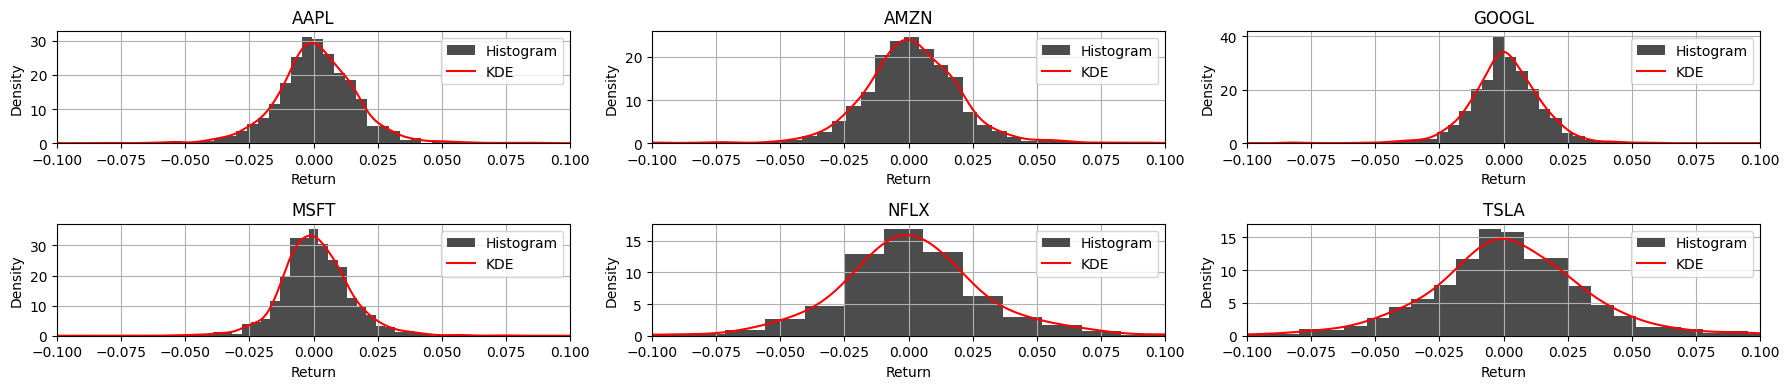

In [ ]:
qf.plot_hist_grid(returns, n_cols=3, bins=50, figsize=(6, 2), log_y_scale=False)


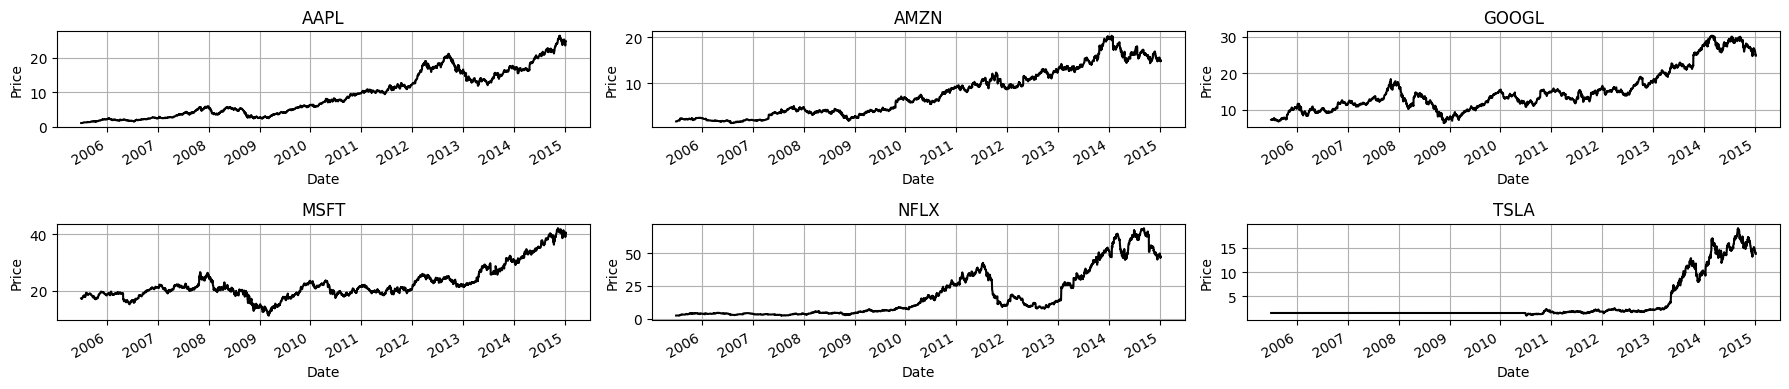

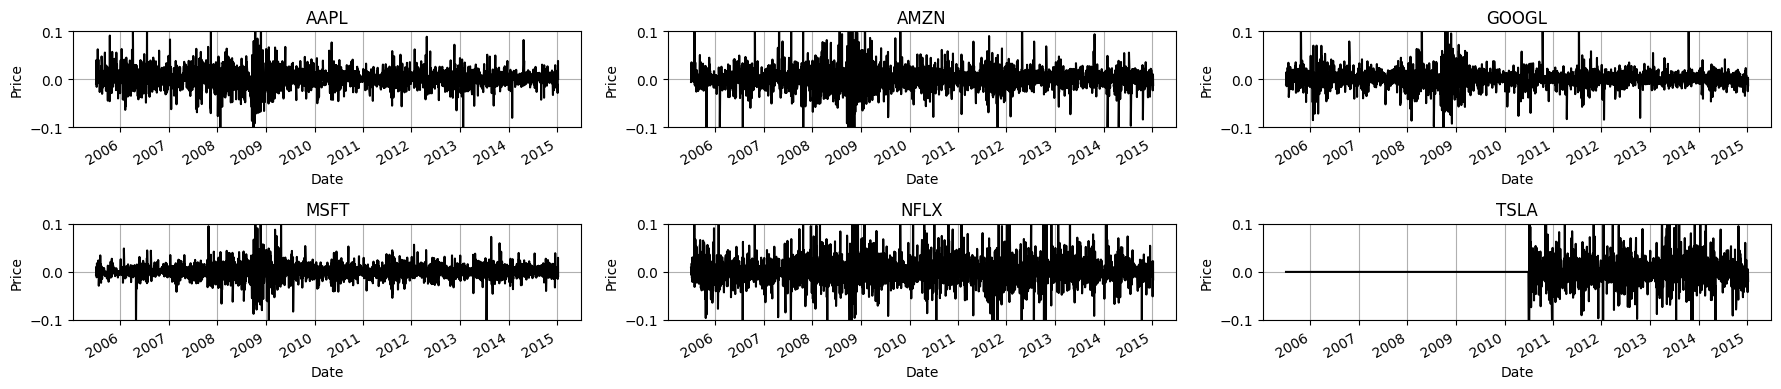

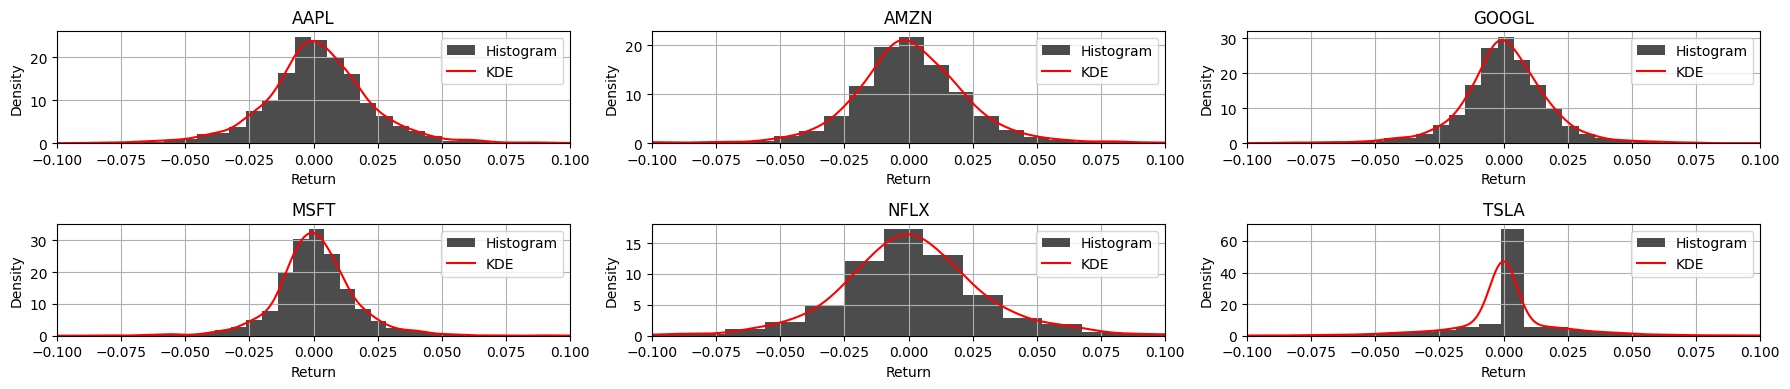

In [ ]:
# Now we want to compare the statistics of the returns of the tickers if we use 
prices_bfill = qf.get_data(tickers, 
            start=qf.DEFAULT_TRAIN_START, 
            end=qf.DEFAULT_TRAIN_END, 
            indicators="close", 
            imputation_method="bfill",
            n_trading_days=252)

returns_bfill = prices_bfill.pct_change().dropna()
log_returns_bfill = prices_bfill.pct_change().apply(lambda x: np.log(1 + x)).dropna()


qf.plot_grid(prices_bfill)

qf.plot_grid(returns_bfill, n_cols=3, ylim=(-0.1, 0.1), figsize=(6, 2))

qf.plot_hist_grid(returns_bfill, n_cols=3, bins=50, figsize=(6, 2), log_y_scale=False)


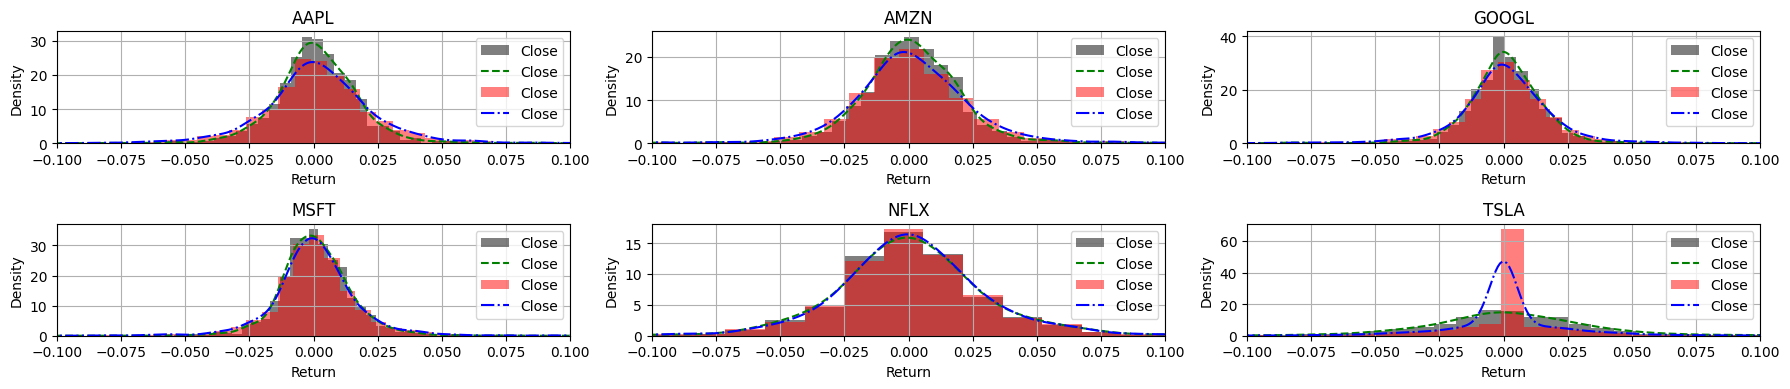

In [ ]:
qf.plot_hist_grid_compare(returns, returns_bfill,
                          n_cols=3, bins=50, figsize=(6, 2))

In [ ]:
# Calculate and compare the statistics of the returns
def calculate_statistics(returns):
    stats = {
        'mean': returns.mean(),
        'std': returns.std(),
        'skew': returns.skew(),
        'kurtosis': returns.kurtosis()
    }
    return stats

stats = calculate_statistics(log_returns)
stats_bfill = calculate_statistics(log_returns_bfill)

import pandas as pd

# Now stats is a dictionary of multiindex dataframes
# Make a new level in the index for the statistics
stats_df = pd.DataFrame(stats).T
stats_bfill_df = pd.DataFrame(stats_bfill).T

error = stats_df - stats_bfill_df

# Absoluter Fehler
abs_error = (stats_df - stats_bfill_df).abs()

# Relativer Fehler nur für std
rel_error_std = abs_error.loc['std'] / stats_df.loc['std']

In [ ]:
abs_error

Ticker,AAPL,AMZN,GOOGL,MSFT,NFLX,TSLA
Price,Close,Close,Close,Close,Close,Close
mean,0.000270,0.000034,0.000181,0.000372,0.000310,0.000991
std,0.005647,0.006379,0.004175,0.003556,0.002516,0.011191
skew,0.116440,0.769358,0.166328,0.390046,0.216686,0.193753
kurtosis,0.163135,6.794232,2.778195,3.931864,6.213390,9.471165


In [ ]:


# Bewertung
tolerable = {
    'mean': abs_error.loc['mean'] < 1e-4,
    'std': rel_error_std < 0.01,
    'skew': abs_error.loc['skew'] < 0.1,
    'kurtosis': abs_error.loc['kurtosis'] < 0.5
}

# Überblick
tolerable_df = pd.DataFrame(tolerable)
print(tolerable_df)

               mean    std   skew  kurtosis
Ticker Price                               
AAPL   Close  False  False  False      True
AMZN   Close   True  False  False     False
GOOGL  Close  False  False  False     False
MSFT   Close  False  False  False     False
NFLX   Close  False  False  False     False
TSLA   Close  False  False  False     False
